# Tessllating Different Cities

This notebook demonstrates how the implemented tessellation methods function for different cities. We select a wide variety of cities on different continents. For example, cities that consist of multipolygons and islands are also considered.

Selected cities are `Barcelona`, `Key West`, `Nairobi`, `Tehran`.

To run this notebook, in addition to `tesspy`, you need `contextily` for basemap visualization. This package is only used to enhance visualization and has no effect on tessellation.

In [1]:
from tesspy import Tessellation
import matplotlib.pyplot as plt
import contextily as ctx

from time import sleep

In [2]:
# Shapely 1.8.1 makes pandas to produce many warnings; this is to get rid of these warnings
import warnings
warnings.simplefilter("ignore")

## Getting city polygons

In [3]:
# Create a tessellation object for each city
barcelona = Tessellation('Barcelona, Spain')
key_west = Tessellation('Key West, United States')
nairobi = Tessellation('Nairobi, Kenia')
tehran = Tessellation('Tehran, Iran')

# get polygone of the investigated area
barcelona_polygon = barcelona.get_polygon()
key_west_polygon = key_west.get_polygon()
nairobi_polygon = nairobi.get_polygon()
tehran_polygon = tehran.get_polygon()

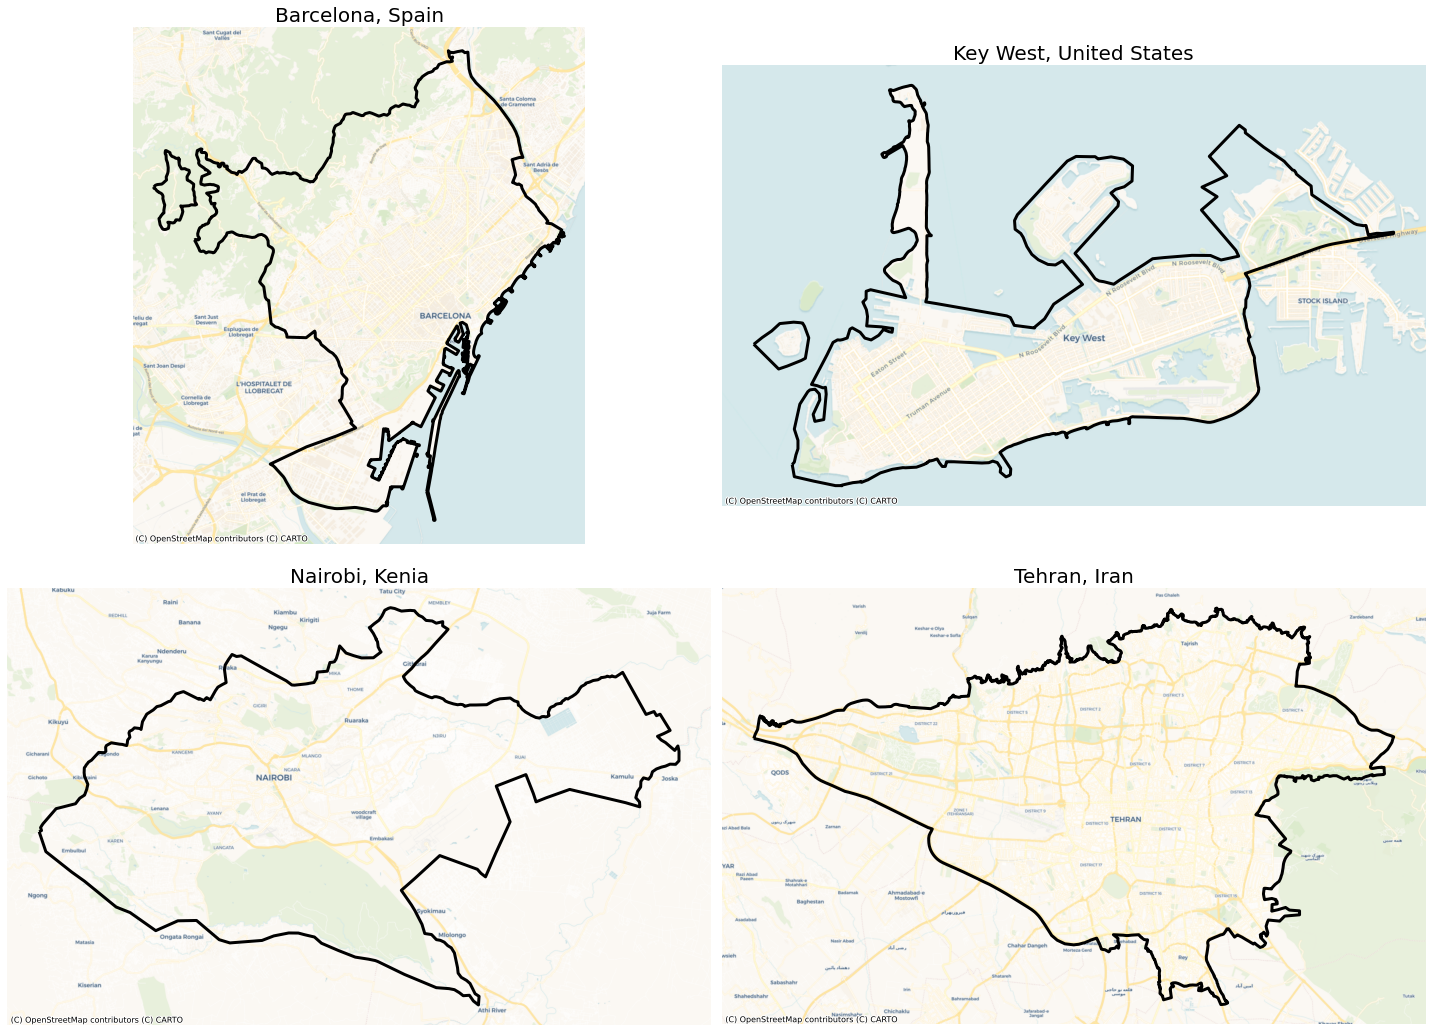

In [4]:
# visualization of areas
cities_polygons= [barcelona_polygon, key_west_polygon, nairobi_polygon, tehran_polygon]
cities_names= ['Barcelona, Spain', 'Key West, United States', 'Nairobi, Kenia', 'Tehran, Iran']

fig, axs = plt.subplots(2,2, figsize=(20,15))

for ax, city_polygon, city_name in zip(axs.flatten(), cities_polygons, cities_names):
    city_polygon.to_crs('EPSG:3857').plot(ax=ax, facecolor='none', lw=3)
    ctx.add_basemap(ax=ax, source=ctx.providers.CartoDB.Voyager)
    ax.set_axis_off()
    ax.set_title(city_name, fontsize=20)
    
plt.tight_layout()

## Squares

In [5]:
# Creating square tessellation

barcelona_squares = barcelona.squares(14)
key_west_squares = key_west.squares(16)
nairobi_squares = nairobi.squares(14)
tehran_squares = tehran.squares(14)

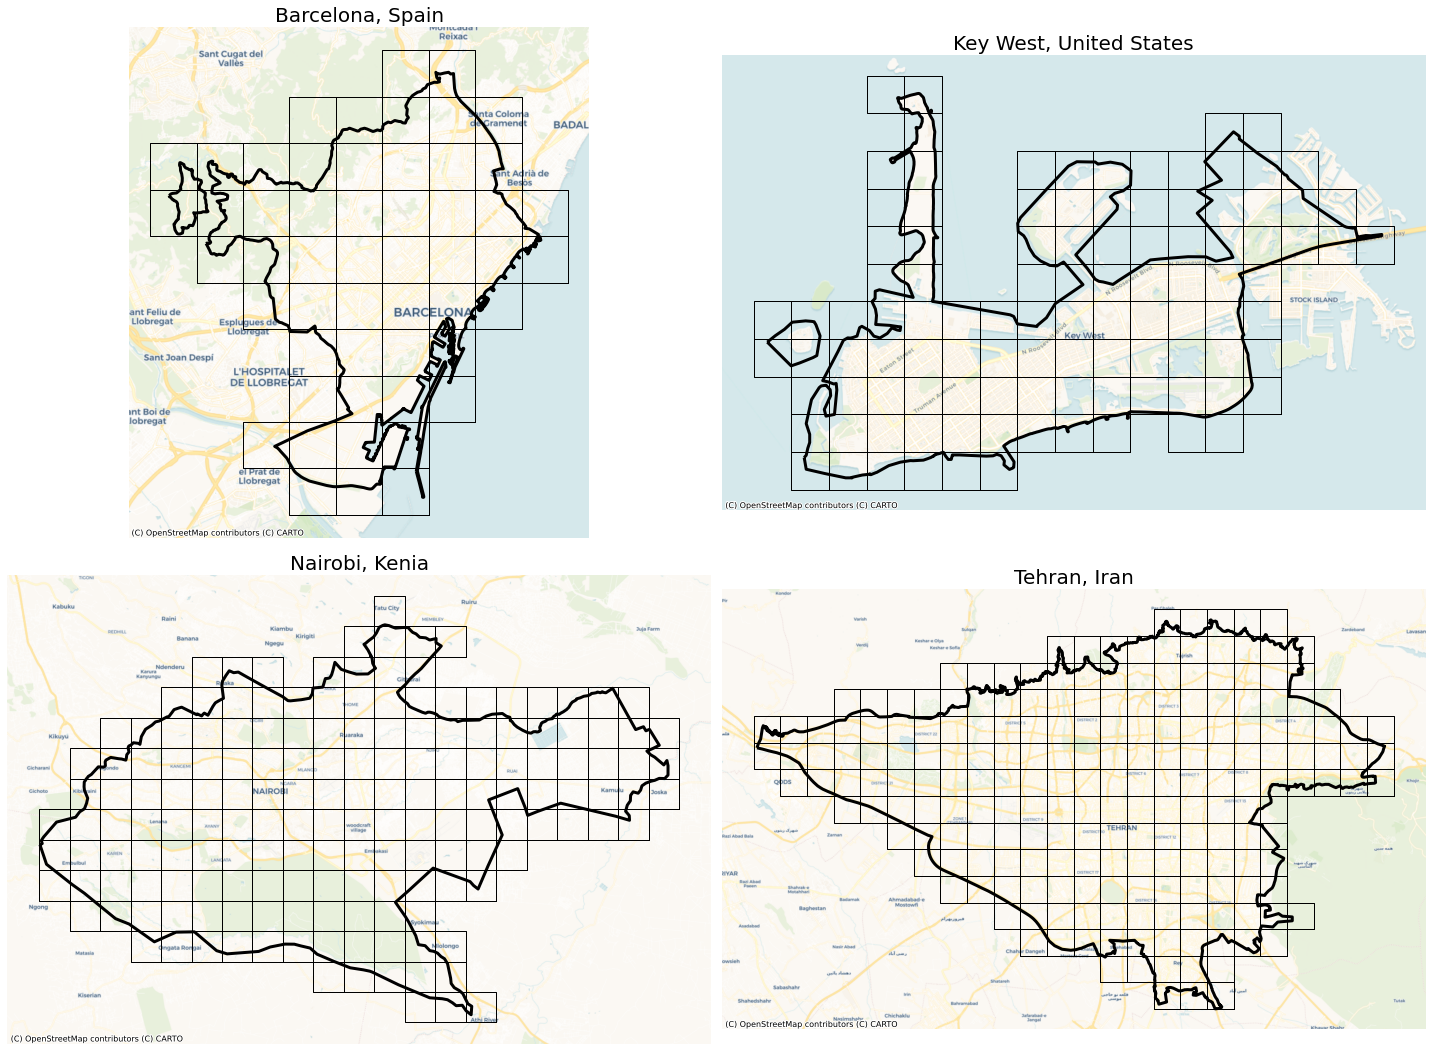

In [6]:
# visualization of square tessellation

cities_squares= [barcelona_squares, key_west_squares, nairobi_squares, tehran_squares]

fig, axs = plt.subplots(2,2, figsize=(20,15))

for ax, city_polygon, city_name, city_square in zip(axs.flatten(), cities_polygons, cities_names, cities_squares):
    city_square.to_crs('EPSG:3857').plot(ax=ax, facecolor='none', edgecolor='k', lw=1)
    city_polygon.to_crs('EPSG:3857').plot(ax=ax, facecolor='none', edgecolor='k', lw=3)
    ctx.add_basemap(ax=ax, source=ctx.providers.CartoDB.Voyager)
    ax.set_axis_off()
    ax.set_title(city_name, fontsize=20)
    
plt.tight_layout()

## Hexagons

In [7]:
# Creating hexagons tessellation

barcelona_hexagons = barcelona.hexagons(8)
key_west_hexagons = key_west.hexagons(9)
nairobi_hexagons = nairobi.hexagons(7)
tehran_hexagons = tehran.hexagons(7)

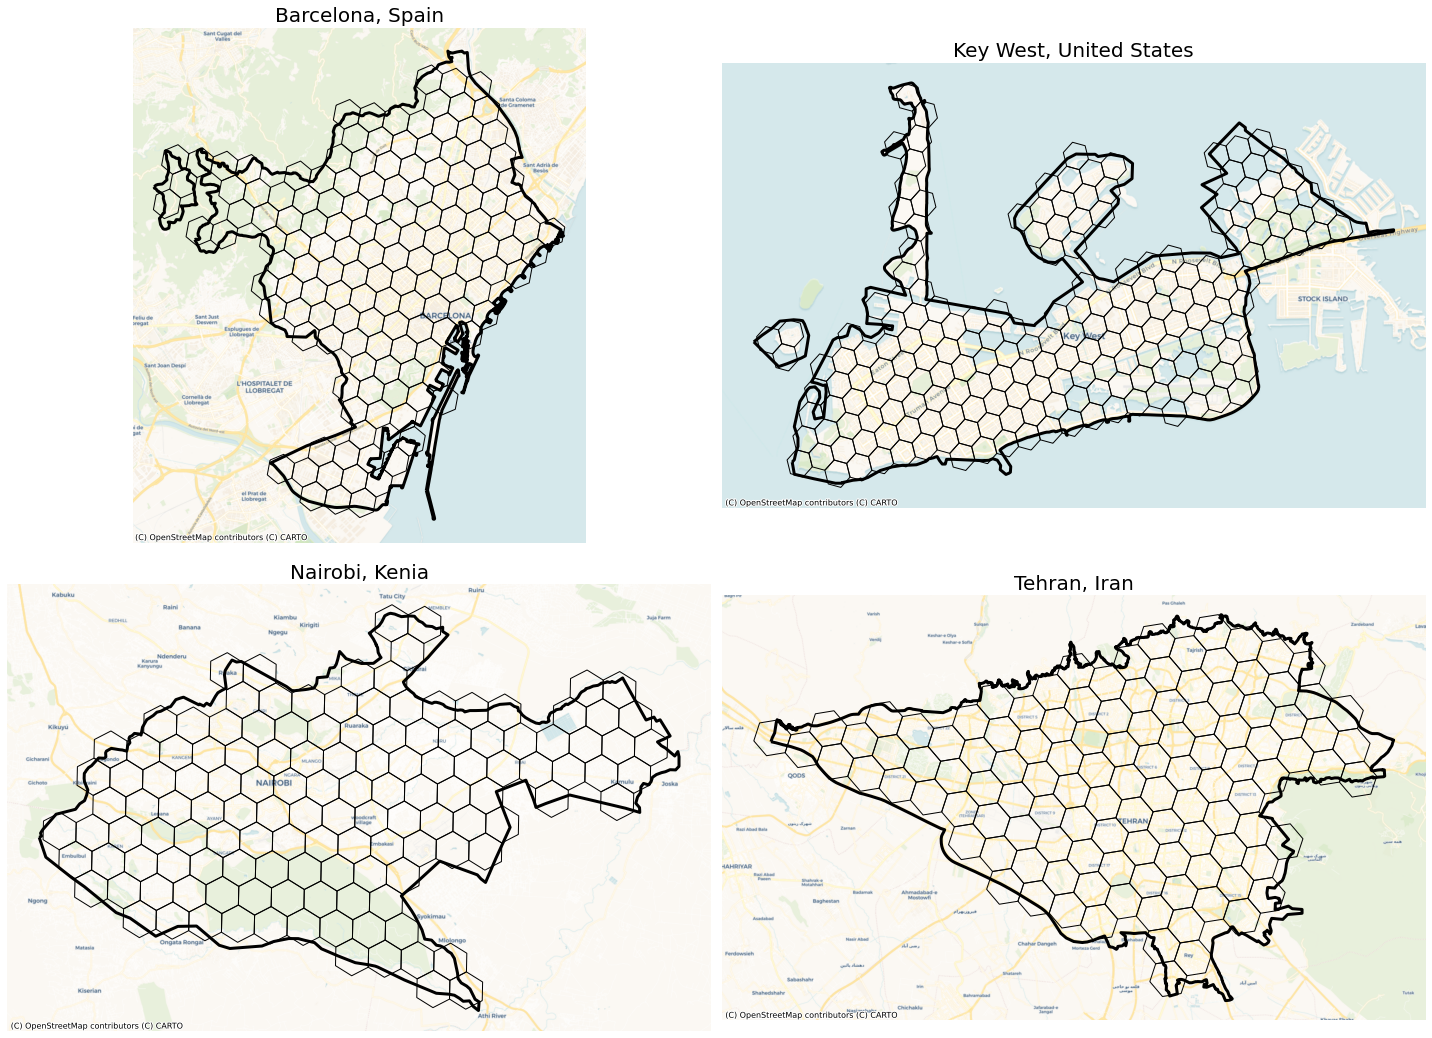

In [8]:
# visualization of hexagons tessellation

cities_hexagons= [barcelona_hexagons, key_west_hexagons, nairobi_hexagons, tehran_hexagons]

fig, axs = plt.subplots(2,2, figsize=(20,15))

for ax, city_polygon, city_name, city_hexagon in zip(axs.flatten(), cities_polygons, cities_names, cities_hexagons):
    city_hexagon.to_crs('EPSG:3857').plot(ax=ax, facecolor='none', edgecolor='k', lw=1)
    city_polygon.to_crs('EPSG:3857').plot(ax=ax, facecolor='none', edgecolor='k', lw=3)
    ctx.add_basemap(ax=ax, source=ctx.providers.CartoDB.Voyager)
    ax.set_axis_off()
    ax.set_title(city_name, fontsize=20)
    
plt.tight_layout()

## Adaptive squares

In order to retrieve data from OpenStreetMap, we need to follow the fair use policy of overpass to avoid useing up all server resources. If we send several requests consequently with the same IP, we get error. Therefore, after each request, we wait 60 second to send the next request.

In [9]:
# Creating adaptive squares tessellation

barcelona_asq = barcelona.adaptive_squares(start_resolution=14, poi_categories=["amenity"])
sleep(60)
key_west_asq = key_west.adaptive_squares(start_resolution=15, poi_categories=["amenity"], threshold=40)
sleep(60)
nairobi_asq = nairobi.adaptive_squares(start_resolution=13, poi_categories=["amenity"], threshold=150)
sleep(60)
tehran_asq = tehran.adaptive_squares(start_resolution=13, poi_categories=["amenity"], threshold=100)

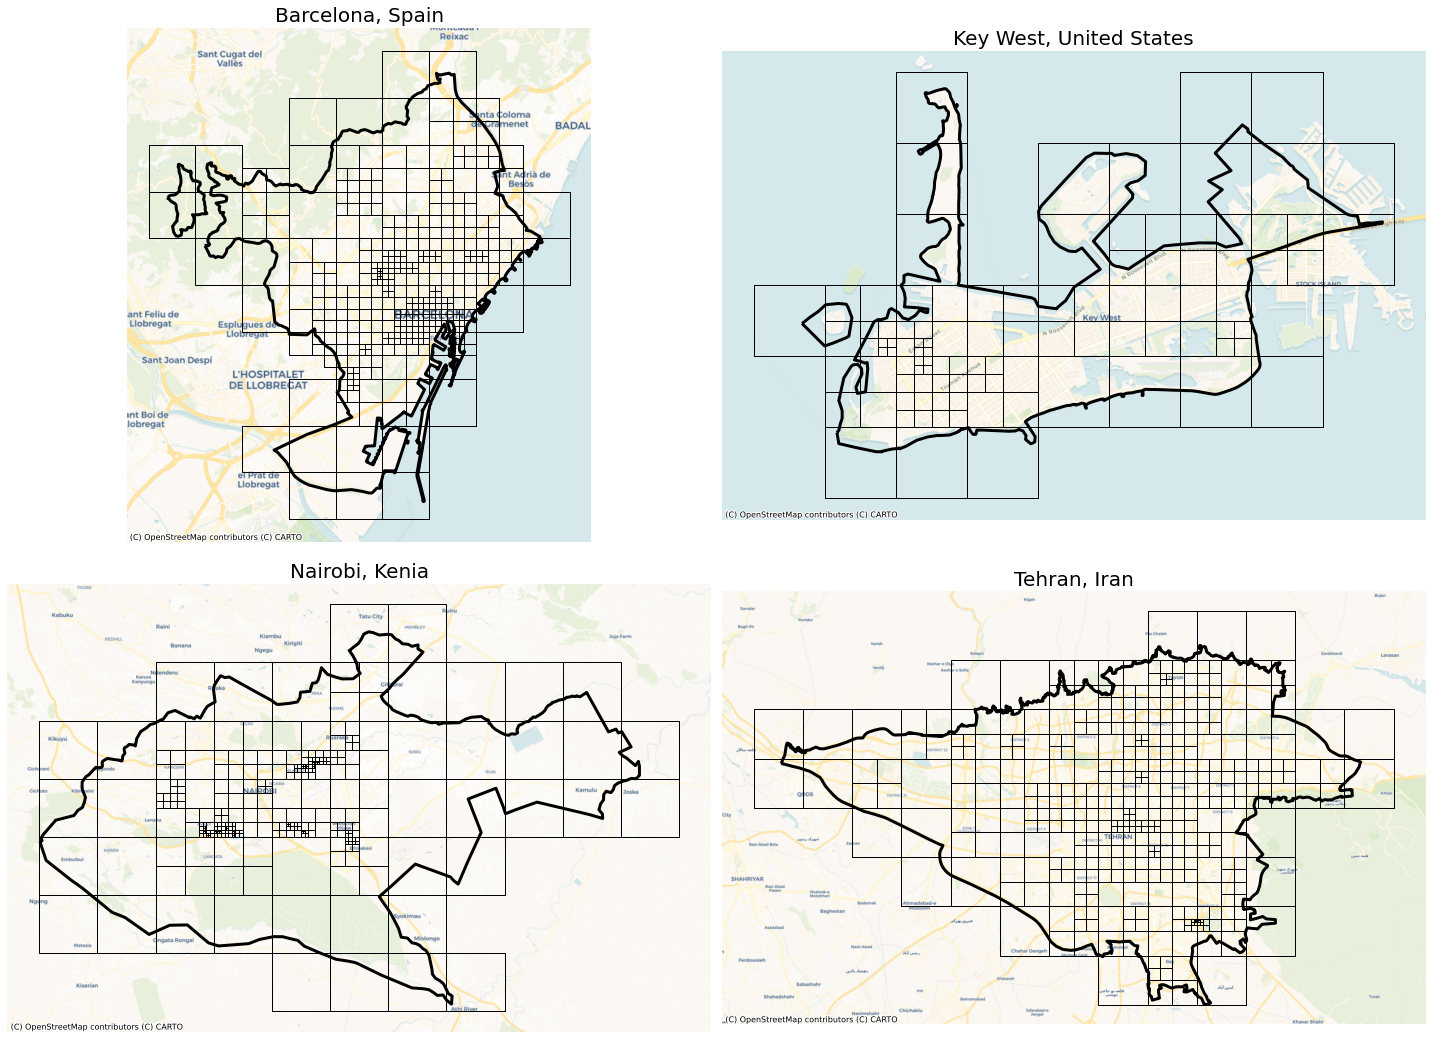

In [10]:
# visualization of adaptive squares tessellation

cities_asq= [barcelona_asq, key_west_asq, nairobi_asq, tehran_asq]

fig, axs = plt.subplots(2,2, figsize=(20,15))

for ax, city_polygon, city_name, city_asq in zip(axs.flatten(), cities_polygons, cities_names, cities_asq):
    city_asq.to_crs('EPSG:3857').plot(ax=ax, facecolor='none', edgecolor='k', lw=1)
    city_polygon.to_crs('EPSG:3857').plot(ax=ax, facecolor='none', edgecolor='k', lw=3)
    ctx.add_basemap(ax=ax, source=ctx.providers.CartoDB.Voyager)
    ax.set_axis_off()
    ax.set_title(city_name, fontsize=20)
    
plt.tight_layout()

## Voronoi Diagrams

In [11]:
# Creating voronoi tessellation

barcelona_vor = barcelona.voronoi(n_polygons=100, poi_categories=["building"])
sleep(60)
key_west_vor = key_west.voronoi(n_polygons=50, poi_categories=["building"])
sleep(90)
nairobi_vor = nairobi.voronoi(n_polygons=200, poi_categories=["building"])
sleep(120)
tehran_vor = tehran.voronoi(n_polygons=300, poi_categories=["building"])

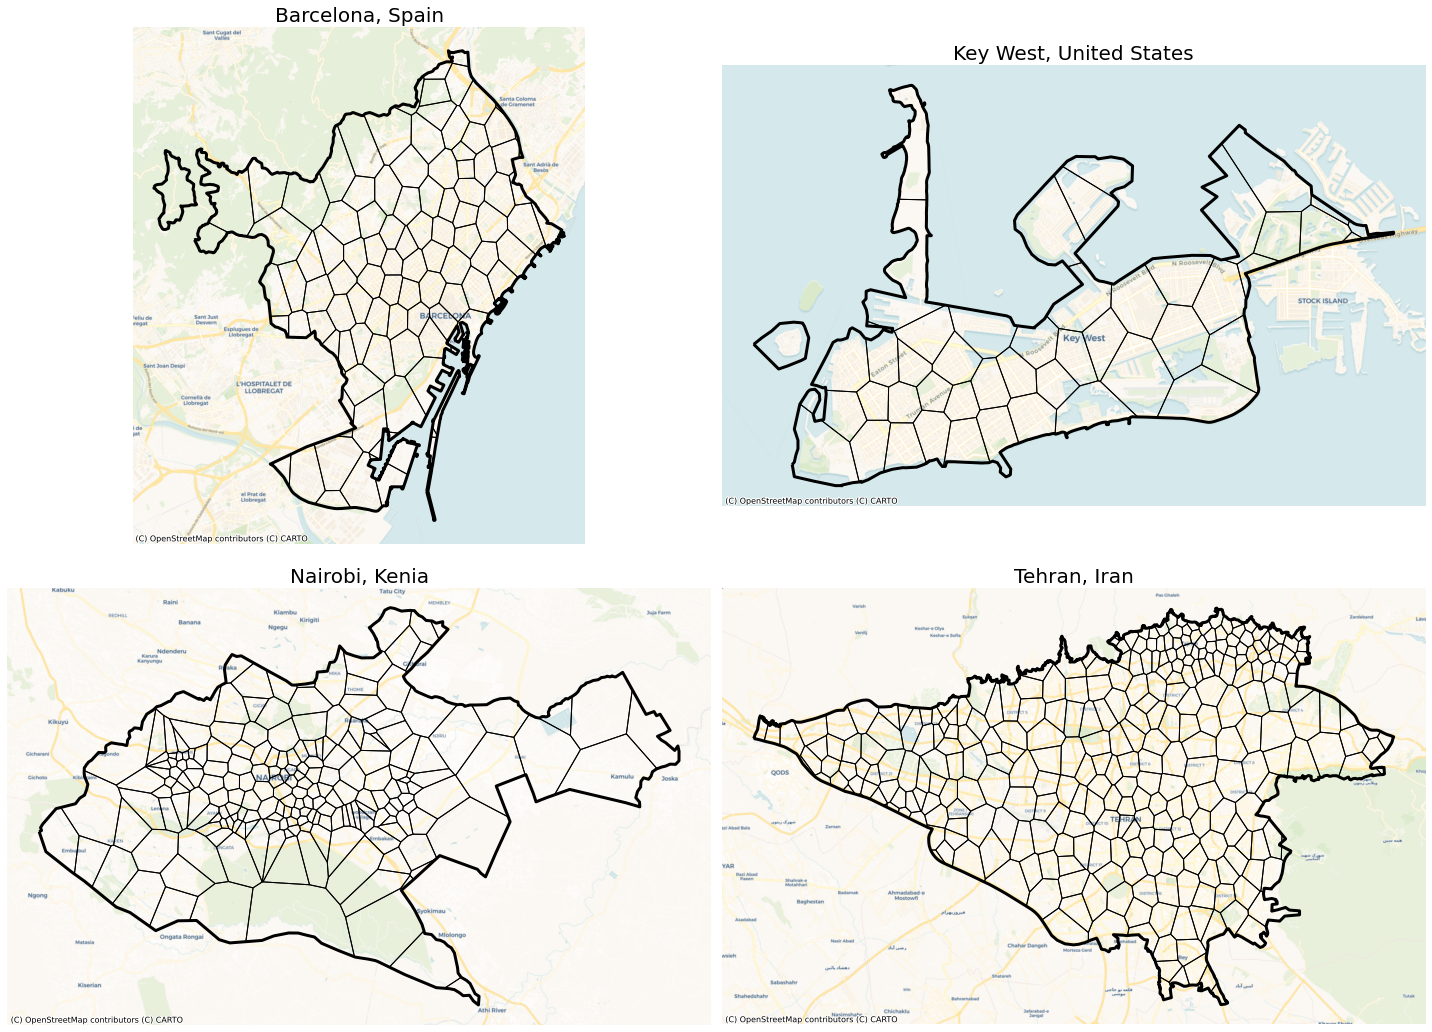

In [12]:
# visualization of voronoi tessellation

cities_vor= [barcelona_vor, key_west_vor, nairobi_vor, tehran_vor]

fig, axs = plt.subplots(2,2, figsize=(20,15))

for ax, city_polygon, city_name, city_vor in zip(axs.flatten(), cities_polygons, cities_names, cities_vor):
    city_vor.to_crs('EPSG:3857').plot(ax=ax, facecolor='none', edgecolor='k', lw=1)
    city_polygon.to_crs('EPSG:3857').plot(ax=ax, facecolor='none', edgecolor='k', lw=3)
    ctx.add_basemap(ax=ax, source=ctx.providers.CartoDB.Voyager)
    ax.set_axis_off()
    ax.set_title(city_name, fontsize=20)
    
plt.tight_layout()

## City Blocks

In [ ]:
# Creating city blocks tessellation

sleep(60)
barcelona_blks = barcelona.city_blocks(n_polygons=500, detail_deg=11)
sleep(60)
key_west_blks = key_west.city_blocks()
sleep(60)
nairobi_blks = nairobi.city_blocks(n_polygons=500)
sleep(60)
tehran_blks = tehran.city_blocks(n_polygons=500, detail_deg=11)

In [ ]:
# visualization of city blocks tessellation

cities_blks= [barcelona_blks, key_west_blks, nairobi_blks, tehran_blks]

fig, axs = plt.subplots(2,2, figsize=(20,15))

for ax, city_polygon, city_name, city_blks in zip(axs.flatten(), cities_polygons, cities_names, cities_blks):
    city_blks.to_crs('EPSG:3857').plot(ax=ax, facecolor='none', edgecolor='k', lw=1)
    city_polygon.to_crs('EPSG:3857').plot(ax=ax, facecolor='none', edgecolor='k', lw=3)
    ctx.add_basemap(ax=ax, source=ctx.providers.CartoDB.Voyager)
    ax.set_axis_off()
    ax.set_title(city_name, fontsize=20)
    
plt.tight_layout()